<a href="https://colab.research.google.com/github/qiongwu-git/Sunday_Projects/blob/master/random_forest_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
housing_data = fetch_california_housing()
df = pd.DataFrame(np.c_[housing_data.data, housing_data.target], columns=housing_data.feature_names + ["target"])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


np.c_[ ] translates slice objects to concatenate along the second axis. Hence likewise, there is also np.r_[ ] 

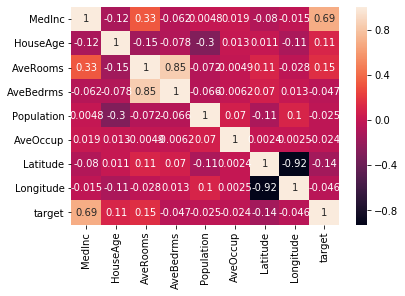

In [5]:
# correlation matrix
import seaborn as sns
corr = df.corr()
ax = sns.heatmap(corr, annot=True)

In [0]:
from sklearn.model_selection import train_test_split
y = df["target"]
X = df.iloc[:, 0:8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [24]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=123, n_jobs=-1)
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                      warm_start=False)

In [25]:
from sklearn.metrics import mean_squared_error as mse
y_pred = reg.predict(X_test)
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, reg.predict(X_train)), mse(y_test, y_pred)))

Mean Squared error on training data --> 0.033998037548409875
Mean Squared error on test data --> 0.24600298151770789


Gap MSE on training and test datasets is huge, which implies our model overfits the data. 

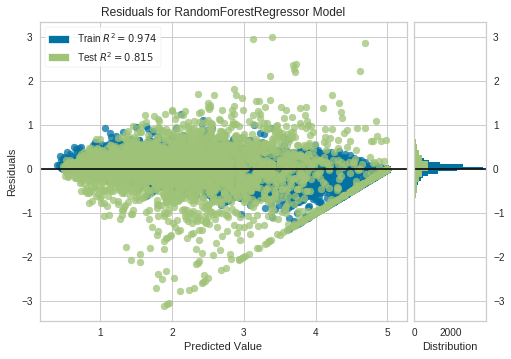

In [26]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(reg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  
visualizer.poof() # which doesn't look very good

In [27]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        'max_depth': range(3,7),
        'n_estimators': (10, 50, 100, 1000),
        },
        cv=5,
        scoring='neg_mean_squared_error',
        verbose=0, n_jobs=-1
        )
grid_result = gs.fit(X_train, y_train)
best_params = grid_result.best_params_
random_forest = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
random_forest.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error as mse
y_pred_test = random_forest.predict(X_test)
y_pred_train = random_forest.predict(X_train)
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, y_pred_train), mse(y_test, y_pred_test)))

Mean Squared error on training data --> 0.3726294931435245
Mean Squared error on test data --> 0.4093590387929863


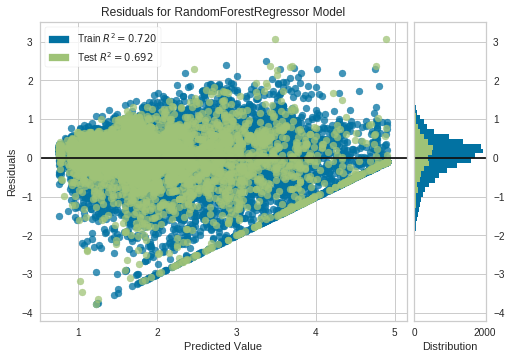

In [28]:
visualizer = ResidualsPlot(random_forest)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  
visualizer.poof()